In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

## 1st experiment

1.51 1.98
0.047
[1, 0, 3, 0, 23, 31, 3, 23, 16, 3]


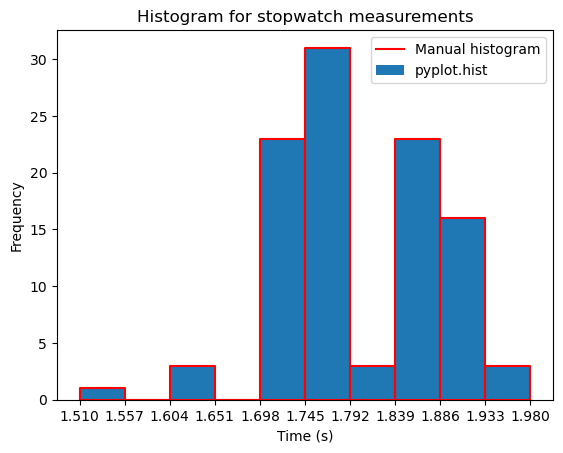

In [41]:
# read data from file
data_chrono = pd.read_csv("data/TD2/data_acquis_chrono.csv")
#print(data_chrono)

# manually make histogram
N_BIN = 10
t_min = data_chrono['T'].min()
t_max = data_chrono['T'].max()
print(t_min, t_max)
interval_size = (t_max-t_min)/N_BIN
print(interval_size)
v_bin = [0 for i in range(N_BIN)]
# central position of each bin
for i in range(N_BIN):
    v_bin[i] = i*interval_size + interval_size/2 + t_min
#print(f"v_bin : {v_bin}")
hist_v = [0 for i in range(N_BIN)]
for i in range(N_BIN):
    count = 0 # number of measurings that fit in bin i
    for j in range(len(data_chrono['T'])):
        #print(data_chrono['T'][j], i, j)
        if (data_chrono['T'][j] >= (v_bin[i] - interval_size/2)) and (data_chrono['T'][j] < (v_bin[i] + interval_size/2)):
            count += 1
    hist_v[i] = count

print(hist_v)


# draw histogram
xticks = np.array(v_bin + [(v_bin[-1]+interval_size)])-interval_size/2
plt.xticks(xticks)

# draw rectangles
for i in range(N_BIN):
    freq_coords = [0, hist_v[i], hist_v[i], 0, 0]
    time_coords = [v_bin[i]-interval_size/2, v_bin[i]-interval_size/2, v_bin[i]+interval_size/2, v_bin[i]+interval_size/2, v_bin[i]-interval_size/2]
    if i == 0 :
        plt.plot(time_coords, freq_coords, marker='',linestyle='-',color='red', label="Manual histogram")
    else :
        plt.plot(time_coords, freq_coords, marker='',linestyle='-',color='red')
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.title("Histogram for stopwatch measurements")
#plt.show()


'''
bin_edges = [0 for i in range(2*N_BIN)]
for i in range(N_BIN):
    bin_edges[2*i] = v_bin[i] - interval_size/2
    bin_edges[2*i+1] = v_bin[i] + interval_size/2
plt.hist(hist_v, bins=N_BIN)
plt.show()
'''
# use plt.hist
plt.hist(data_chrono['T'], bins=N_BIN, label="pyplot.hist")
plt.legend()
plt.show()


# plt.his




#print(hist_v)


Red outline is hand made, the blue columns are outputted by the python function


## 2nd experiment

Something with the scale of the normal distribution and histogram plots doesn't work

In [42]:
# returns the standard deviation of a set of data, given the mean
def std_deviation(x, mean):
    return np.sqrt(np.sum([(e-mean)**2 for e in x]) / len(x) )

# returns a normally distributed dataset over given interval x 
# with given mean and standard deviation
def normal_distrib(x, mean, sigma):
    gauss = np.exp(-0.5*((x-mean)/sigma)**2)
    return gauss / (sigma*np.sqrt(2*np.pi))

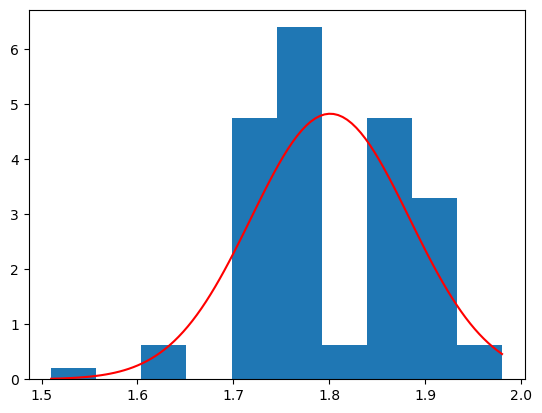

Hand std 0.08258101989457484, numpy std 0.08258101989457484


In [43]:
fall_data = data_chrono['T']

mean_time = np.mean(fall_data)
sigma = std_deviation(fall_data, mean_time)

x = np.linspace(fall_data.min(), fall_data.max(), 100)

normal_dist = normal_distrib(x, mean_time, sigma)

plt.hist(fall_data, bins=N_BIN, color=None, density=True)
plt.plot(x, normal_dist, color="r")

plt.show()

print(f"Hand std {sigma}, numpy std {np.std(fall_data)}")

### Monte Carlo

In [44]:
# random values following normal distribution
mu = 5
sig = 0.2
X1 = np.random.normal(mu, sig, 20)
X2 = np.random.normal(mu, sig, 100)
X3 = np.random.normal(mu, sig, 5000)

x_theo = np.linspace(np.min(X3), np.max(X3), 1000)



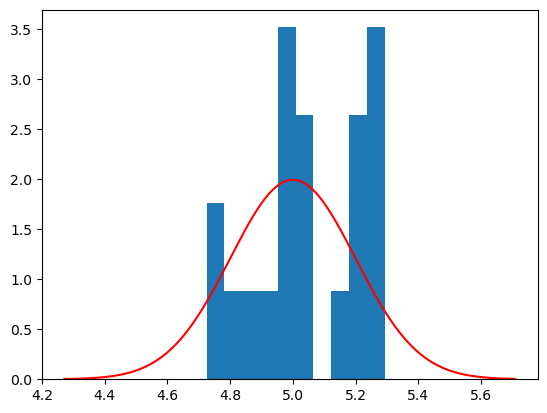

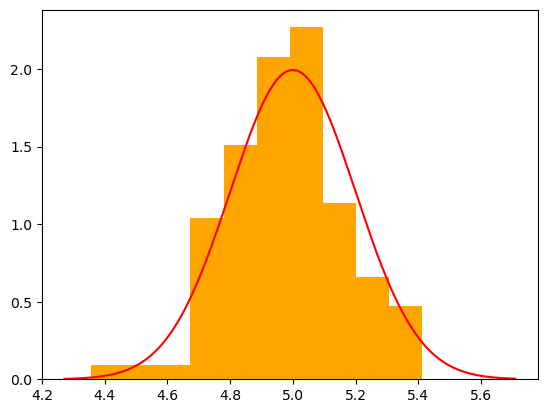

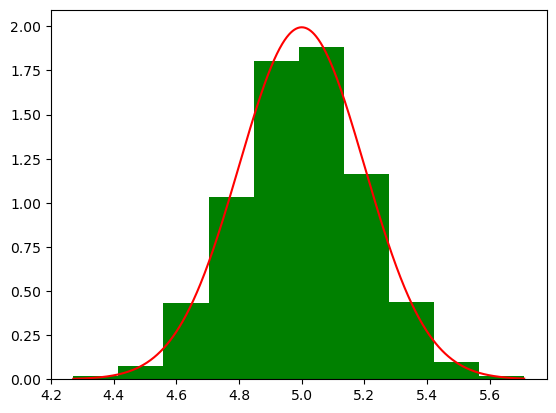

N = 20, sigma=0.16988010539441112, mean=5.0489951662033
N = 100, sigma=0.18783239244038874, mean=4.981660160484526
N = 5000, sigma=0.20142300298628327, mean=4.99640405008635


In [45]:
# density=True normalises the histogram such that the total area is equal to unity

plt.hist(X1, bins=10, density=True)
plt.plot(x_theo, normal_distrib(x_theo, mu, sig), color="r")
plt.show()
plt.hist(X2, bins=10, color="orange", density=True)
plt.plot(x_theo, normal_distrib(x_theo, mu, sig), color="r")
plt.show()
plt.hist(X3, bins=10, color="g", density=True)
plt.plot(x_theo, normal_distrib(x_theo, mu, sig), color="r")

plt.show()


print(f"N = 20, sigma={np.std(X1)}, mean={np.mean(X1)}")
print(f"N = 100, sigma={np.std(X2)}, mean={np.mean(X2)}")
print(f"N = 5000, sigma={np.std(X3)}, mean={np.mean(X3)}")

The 'experimental' mean and standard deviation approach the real values of $μ=5$ and $σ=0.2$ as $N \to ∞$

In [46]:
mu_x = 2
sig_x = 0.05

mu_y = 3
sig_y = 0.1

N = 500

Xmc = np.random.normal(mu_x, sig_x, N)
Ymc = np.random.normal(mu_y, sig_y, N)

print(f"mean X = {np.mean(Xmc)}")
print(f"mean Y = {np.mean(Ymc)}")

print()

Zmc = Xmc + Ymc
print(f"Z, mean={np.mean(Zmc)}, sigma={np.std(Zmc)}")
sig_Z_from_formula = np.sqrt(np.std(Xmc)**2 + np.std(Ymc)**2)
print(f"Compared to the result from formula, std Z = {sig_Z_from_formula}")

print()

Wmc = Xmc * Ymc
print(f"W, mean={np.mean(Wmc)}, sigma={np.std(Wmc)}")
sig_W_from_formula = np.mean(Wmc) * np.sqrt((np.std(Xmc)/np.mean(Xmc))**2 + (np.std(Ymc)/np.mean(Ymc))**2)
print(f"Compared to the result from formula, std W = {sig_W_from_formula}")


mean X = 1.9979418958962802
mean Y = 2.996560791622901

Z, mean=4.994502687519182, sigma=0.11061175885666742
Compared to the result from formula, std Z = 0.11249934520483264

W, mean=5.986743778446443, sigma=0.24663975363853022
Compared to the result from formula, std W = 0.25203558396940634


### Conclusion, the formulas are pretty good

## Exercise 5 (refraction index)

In [47]:
N = 500

# mean and std of each variable

mu_A = np.deg2rad(60) # deg
sig_A = np.deg2rad(2/60) # deg

mu_D = np.deg2rad(53 + 35/60)
sig_D = np.deg2rad(2/60)

# normally distributed dataset for Monte Carlo simulation

Amc = np.random.normal(mu_A, sig_A, N)
Dmc = np.random.normal(mu_D, sig_D, N)

#print(Amc, Dmc)

In [48]:
n_mc = np.sin((Amc+Dmc)/2)/np.sin(Amc/2)
mu_n = np.mean(n_mc)
sig_n = np.std(n_mc)
print(f"n: mean={mu_n}, std={sig_n}")

# do this another day
#def partial_D(A,)


n: mean=1.6733950482853566, std=0.0006113490188197391


Data preparation

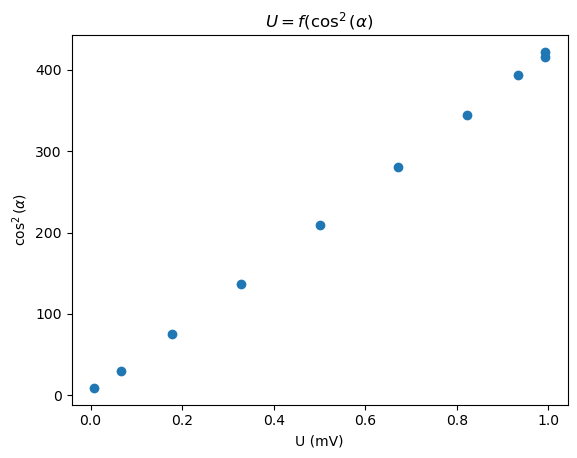

In [49]:
malus_data = pd.read_csv("data/dataMalus.csv")
#print(malus_data)#["U (en mV)"])
alpha = np.deg2rad(malus_data["alpha (en degre)"])
U = malus_data["U (en mV)"]

# systematic error of -5 degrees
alpha_0 = np.deg2rad(-5)

cos2_alpha = np.cos(alpha+alpha_0)**2
plt.scatter(cos2_alpha, U)
plt.title(r"$U=f(\cos^2(\alpha)$")
#plt.legend()
plt.xlabel("U (mV)")
plt.ylabel(r"$\cos^2(\alpha)$")
plt.show()


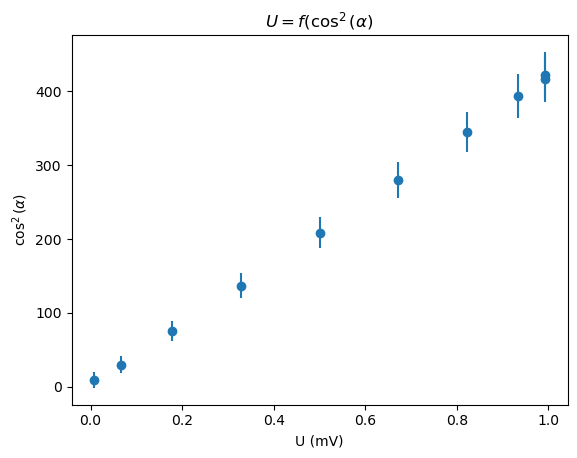

In [50]:
# voltage uncertainty given by handbook
U_err = np.abs(U*0.05) + 10

plt.errorbar(cos2_alpha, U, fmt="o", yerr=U_err)
plt.title(r"$U=f(\cos^2(\alpha)$")
#plt.legend()
plt.xlabel("U (mV)")
plt.ylabel(r"$\cos^2(\alpha)$")
plt.show()

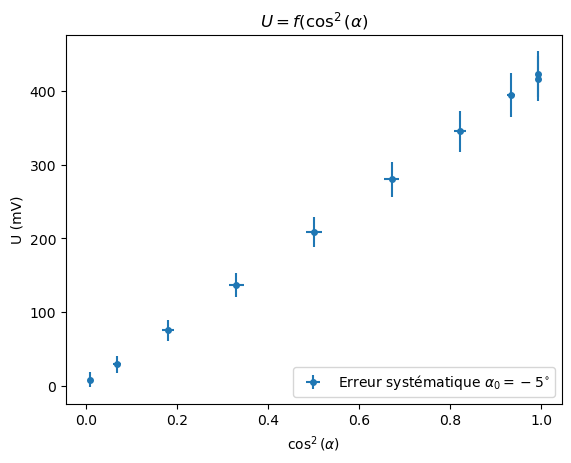

In [51]:
# monte carlo method to simulate error propagation
sig_alpha = np.deg2rad(1)

sig_cos2 = np.zeros(len(alpha))

for i in range(len(alpha)):
    # correct for the known systematic error
    a = alpha[i] + alpha_0

    # normally distributed data set centred on the experimental value
    a_mc = np.random.normal(a, sig_alpha, 10000)
    
    cos2 = np.cos(a_mc)**2

    # collect the standard deviation of the resulting dataset
    sig_cos2[i] = np.std(cos2)

# plot the errors

plt.errorbar(cos2_alpha, U, fmt="o", yerr=U_err, xerr=sig_cos2, markersize=4, label=r"Erreur systématique $\alpha_0 = -5 ^{\circ}$")
plt.title(r"$U=f(\cos^2(\alpha)$")
plt.legend(loc="lower right")
plt.ylabel("U (mV)")
plt.xlabel(r"$\cos^2(\alpha)$")

#plt.text(100, 200, r"Erreur systématique $\alpha_0 = -5 ^{\circ}$")

plt.show()







### C.2 Retour sur l'ajustement linéaire

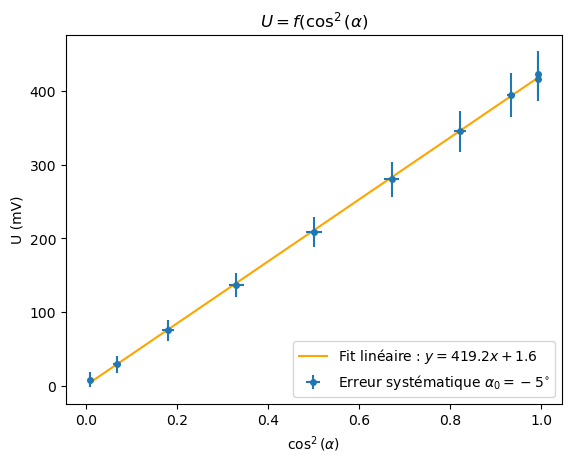

In [52]:
N = len(cos2_alpha)


Delta = N*np.sum(cos2_alpha**2) - np.sum(cos2_alpha)**2

A = (N*np.sum(cos2_alpha*U) - np.sum(cos2_alpha)*np.sum(U))/Delta
B = (np.sum(U)*np.sum(cos2_alpha**2) - np.sum(cos2_alpha)*np.sum(U*cos2_alpha))/Delta


plt.errorbar(cos2_alpha, U, fmt="o", yerr=U_err, xerr=sig_cos2, markersize=4, label=r"Erreur systématique $\alpha_0 = -5 ^{\circ}$")
plt.plot(cos2_alpha, (A*cos2_alpha + B), color="orange", zorder=-4, label=f"Fit linéaire : $y = {A:0.1f}x + {B:0.1f}$")
plt.title(r"$U=f(\cos^2(\alpha)$")
plt.legend(loc="lower right")
plt.ylabel("U (mV)")
plt.xlabel(r"$\cos^2(\alpha)$")

#plt.text(100, 200, r"Erreur systématique $\alpha_0 = -5 ^{\circ}$")

plt.show()


with reglin() function

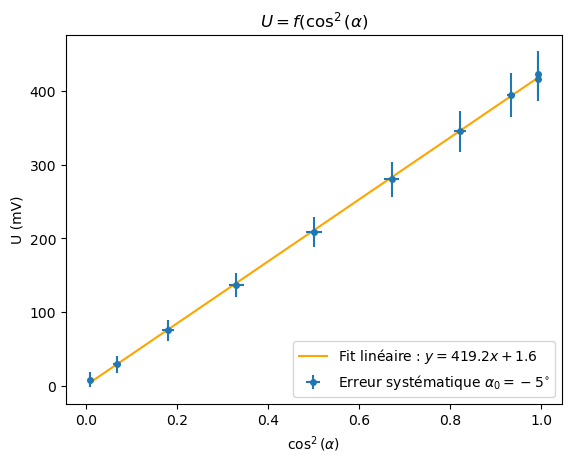

In [53]:
def reglin(X, Y):
    N = len(X) # assuming X and Y have same shape

    Delta = N*np.sum(X**2) - np.sum(X)**2

    A = (N*np.sum(X*U) - np.sum(X)*np.sum(Y))/Delta
    B = (np.sum(Y)*np.sum(X**2) - np.sum(X)*np.sum(Y*X))/Delta

    return A, B

# again but with the function 

A_2, B_2 = reglin(cos2_alpha, U)

plt.errorbar(cos2_alpha, U, fmt="o", yerr=U_err, xerr=sig_cos2, markersize=4, label=r"Erreur systématique $\alpha_0 = -5 ^{\circ}$")
plt.plot(cos2_alpha, (A_2*cos2_alpha + B_2), color="orange", zorder=-4, label=f"Fit linéaire : $y = {A_2:0.1f}x + {B_2:0.1f}$")
plt.title(r"$U=f(\cos^2(\alpha)$")
plt.legend(loc="lower right")
plt.ylabel("U (mV)")
plt.xlabel(r"$\cos^2(\alpha)$")

#plt.text(100, 200, r"Erreur systématique $\alpha_0 = -5 ^{\circ}$")

plt.show()
    

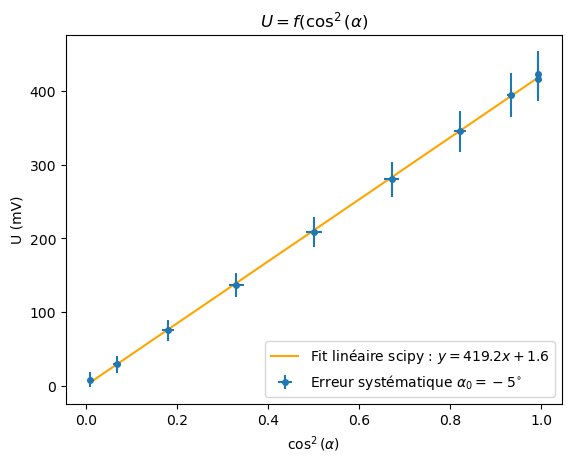

In [54]:
# using scipy.optimize.curvefit()

def lin_model(x, a, b):
    return a*x + b

popt, pcov = curve_fit(lin_model, cos2_alpha, U)
A_scipy, B_scipy = popt


plt.errorbar(cos2_alpha, U, fmt="o", yerr=U_err, xerr=sig_cos2, markersize=4, label=r"Erreur systématique $\alpha_0 = -5 ^{\circ}$")
plt.plot(cos2_alpha, (A_scipy*cos2_alpha + B_scipy), color="orange", zorder=-4, label=f"Fit linéaire scipy : $y = {A_scipy:0.1f}x + {B_scipy:0.1f}$")
plt.title(r"$U=f(\cos^2(\alpha)$")
plt.legend(loc="lower right")
plt.ylabel("U (mV)")
plt.xlabel(r"$\cos^2(\alpha)$")

#plt.text(100, 200, r"Erreur systématique $\alpha_0 = -5 ^{\circ}$")

plt.show()


## C.3 Estimation des incertitudes sur les paramètres de l'ajustement

A – mean : 418.05773999238164, std : 19.351009882151118
B – mean : 2.019995838981517, std : 8.526251980555932


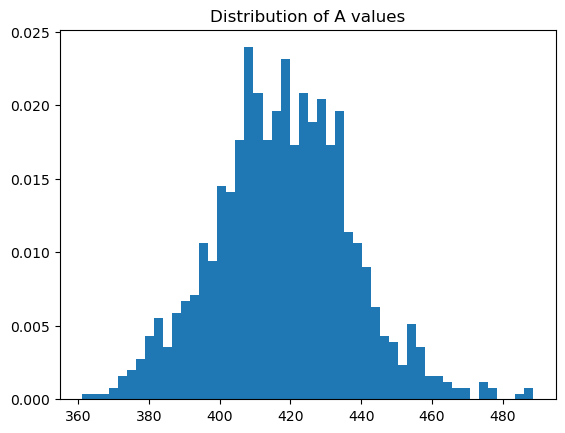

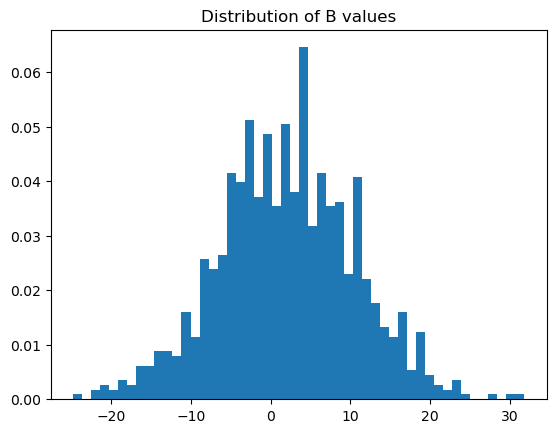

In [55]:
# store coeffs for each model in a 2D array


n_models = 1000
coeffs = np.zeros((n_models, 2))
#print(coeffs)
#print(np.shape(cos2_alpha))
for i in range(n_models):
    # taking cos2_alpha as the mean of the distribution
    x_mc = np.random.normal(cos2_alpha, sig_cos2)

    y_mc = np.random.normal(U, U_err)
    
    #print(np.shape(x_mc), np.shape(y_mc))
    popt, pcov = curve_fit(lin_model, x_mc, y_mc)
    #popt, pcov = curve_fit(lin_model, cos2_alpha, U)
    

    #print(popt)
    coeffs[i] = popt
    #print(coeffs[i][0])
    #input()
    #coeffs[i][0] = A
    #coeffs[i][1] = B


coeffs_t = np.transpose(coeffs)

#print(coeffs)
#print(coeffs_t)

A_mean = np.mean(coeffs_t[0])
A_std = np.std(coeffs_t[0])

print(f"A – mean : {A_mean}, std : {A_std}")

B_mean = np.mean(coeffs_t[1])
B_std = np.std(coeffs_t[1])

print(f"B – mean : {B_mean}, std : {B_std}")

plt.hist(coeffs_t[0], bins=50, density=True)
plt.title("Distribution of A values")
plt.show()

plt.hist(coeffs_t[1], bins=50, density=True)
plt.title("Distribution of B values")
plt.show()

Ex. 8

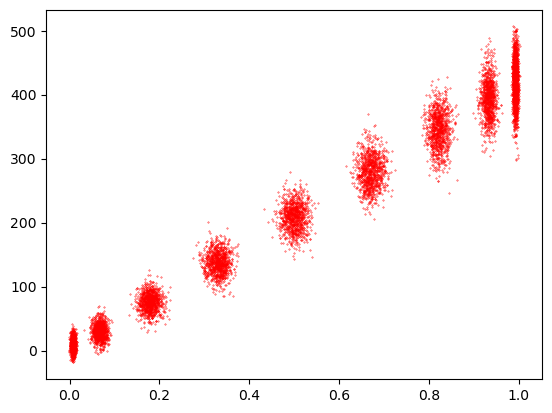

<Figure size 3000x2400 with 0 Axes>

In [56]:
# generates normally distributed X, Y dataset

def gen_dataset(x, y, x_std, y_std):
    return np.random.normal(x, x_std), np.random.normal(y, y_std)

for i in range(n_models):

    cos2_mc, U_mc = gen_dataset(cos2_alpha, U, sig_cos2, U_err)

    #popt, pcov = curve_fit(lin_model, cos2_mc, U_mc)
    #A, B = popt
    #print(A, B)

    #plt.plot(cos2_mc, A*cos2_mc+B, color="r", alpha=0.1, zorder=-1)

    plt.scatter(cos2_mc, U_mc, color="r", s=0.1)

plt.figure(figsize=(10, 8), dpi=300)
plt.show()

Text(0.5, 0, '$\\cos^2(\\alpha)$')

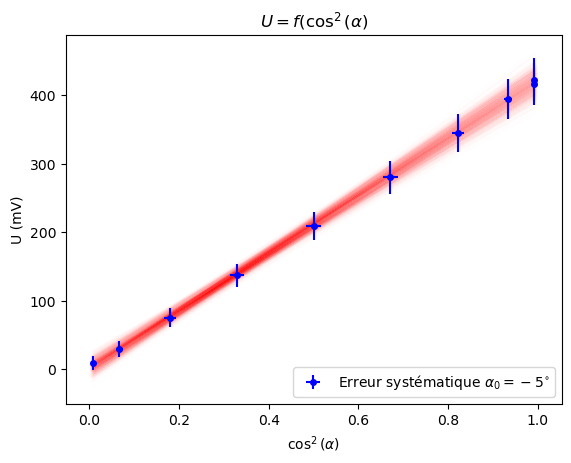

In [57]:
# coeffs for the n linear models
As = np.zeros(n_models)
Bs = np.zeros(n_models)

for i in range(n_models):
    cos2_mc, U_mc = gen_dataset(cos2_alpha, U, sig_cos2, U_err)

    popt, pcov = curve_fit(lin_model, cos2_mc, U_mc)
    A, B = popt
    As[i] = A
    Bs[i] = B
    
    # plotting the model, making line colour translucent
    plt.plot(cos2_mc, A*cos2_mc+B, color="r", alpha=5/n_models, zorder=-1)

plt.errorbar(cos2_alpha, U, fmt="o", yerr=U_err, xerr=sig_cos2, markersize=4, label=r"Erreur systématique $\alpha_0 = -5 ^{\circ}$", color="b")
plt.title(r"$U=f(\cos^2(\alpha)$")
plt.legend(loc="lower right")
plt.ylabel("U (mV)")
plt.xlabel(r"$\cos^2(\alpha)$")
    
    

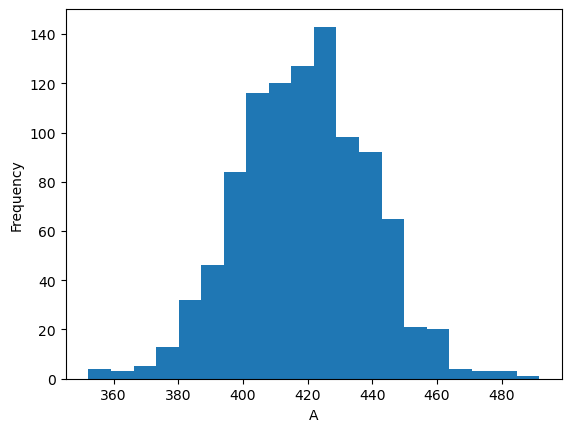

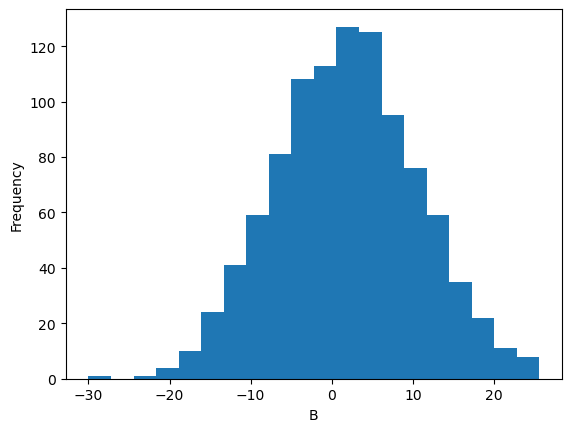

In [58]:
# Plotting histogram

plt.hist(As, bins=20)
plt.xlabel("A")
plt.ylabel("Frequency")
plt.show()

plt.hist(Bs, bins=20)
plt.xlabel("B")
plt.ylabel("Frequency")
plt.show()

### C.4 Ajustement non linéaire - Pendule amorti

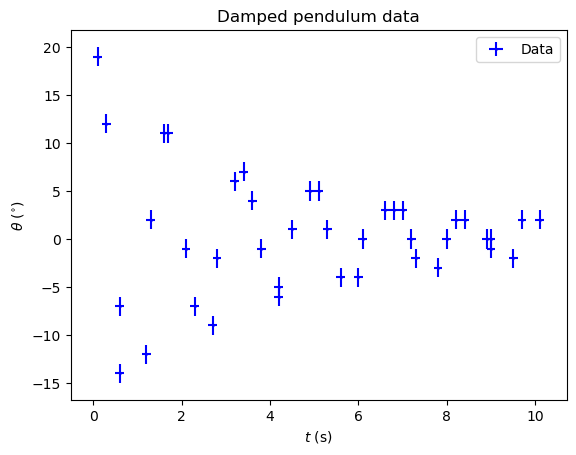

In [59]:
pendulum_table = pd.read_csv("data/TD2/Mesure_TP_pendule.csv")
#print(pendulum_table)

# fetching the columns
t = pendulum_table['t[s]']
t_std = pendulum_table['dt[s]']
theta = pendulum_table['theta[deg]']
theta_std = pendulum_table['dtheta[deg]']

# plotting data with uncertainties
plt.errorbar(t, theta, xerr=t_std, yerr=theta_std, color="b", fmt='o', markersize=1, label="Data")
plt.xlabel("$t$ (s)")
plt.ylabel(r"$\theta$ ($^{\circ}$)")
plt.title("Damped pendulum data")

plt.legend()
plt.show()
#print(pendulum_table['dt[s]'][0])

### Premier essai de modélisation

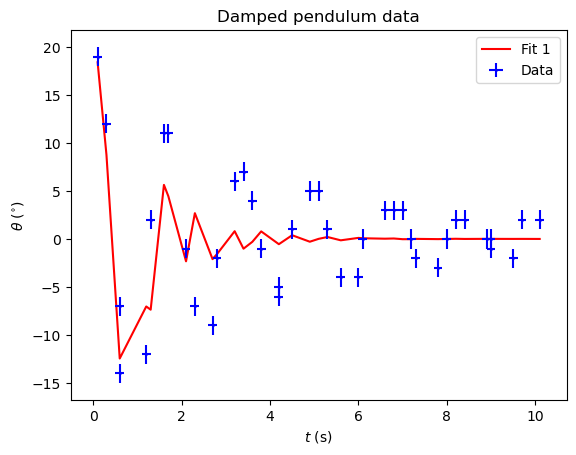

In [60]:
# fitting with model of damped harmonic oscillator

def damped_model(t, theta0, omeg, phi, alpha):
    return theta0*np.exp(-alpha*t)*np.cos(omeg*t + phi)

popt, pcov = curve_fit(damped_model, t, theta)

theta0, omeg, phi, alpha = popt

plt.plot(t, damped_model(t, theta0, omeg, phi, alpha), color="r", label="Fit 1")
plt.errorbar(t, theta, xerr=t_std, yerr=theta_std, color="b", fmt='o', markersize=1, label="Data")
plt.xlabel("$t$ (s)")
plt.ylabel(r"$\theta$ ($^{\circ}$)")
plt.title("Damped pendulum data")

plt.legend()
plt.show()


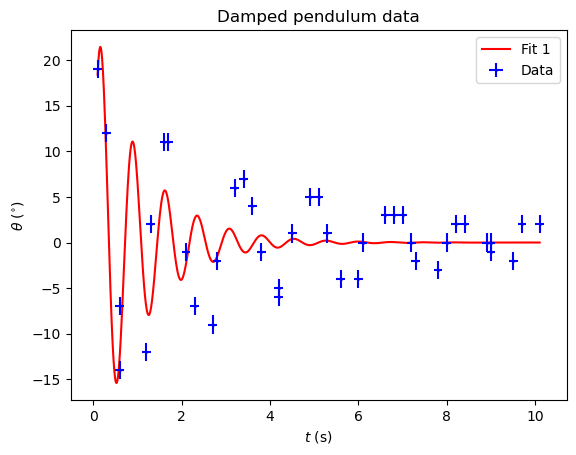

In [61]:
# using same damped harmonic model, but with shorter timesteps

t_theo = np.linspace(np.min(t), np.max(t), 1000)

plt.plot(t_theo, damped_model(t_theo, theta0, omeg, phi, alpha), color="r", label="Fit 1")
plt.errorbar(t, theta, xerr=t_std, yerr=theta_std, color="b", fmt='o', markersize=1, label="Data")
plt.xlabel("$t$ (s)")
plt.ylabel(r"$\theta$ ($^{\circ}$)")
plt.title("Damped pendulum data")

plt.legend()
plt.show()

In [62]:
print("Fit parameters")
print(f"theta0 = {theta0}")
print(f"omega = {omeg}")
print(f"phi = {phi}")
print(f"alpha = {alpha}")

Fit parameters
theta0 = 24.949607869012546
omega = 8.615603448934264
phi = 11.073729861008026
alpha = 0.9066654247677949


However pretty it may be, this is a bad fit, the parameters we find do not correspond to the actual parameters of the physical pendulum (see TD2v1_portrait.pdf)

We are trying to optimise, find the global minimum in a 4 dimensional parameter space. Which is hard, the algorithm is likely to get stuck on local minimas. If we give our algorithm rough estimates of what our parameters are like, then it will likely perform better.

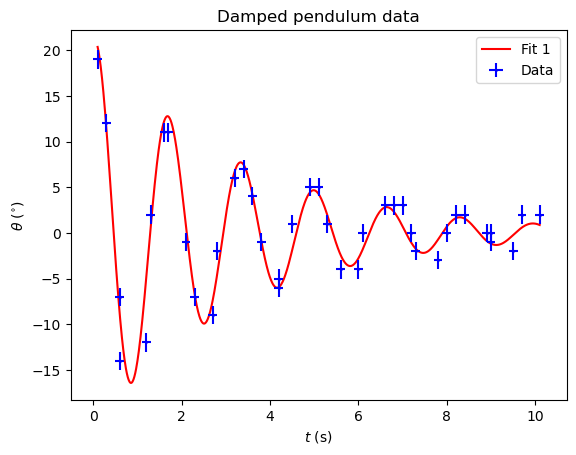

In [63]:
# we run the fitting algo. at a point in parameter space that is 
# expected to be close to the global minimum

# sensible guesstimates for our initial parameters

theta0_init = np.max(theta) # there is damping + no injection of energy
T_init = 1.8 # rough estimate from scatter plot
omeg_init = 2*np.pi/T_init
phi_init = 0 # maximum of cosine curve seems to be close to 0


# exp(-alpha*3T) = 1/4
# after 3 periods, amplitude seems to decrease by factor of roughly 4
alpha_init = np.log(4)/(3*T_init)


popt, pcov = curve_fit(damped_model, t, theta, p0=[theta0_init, omeg_init, phi_init, alpha_init])

theta0_2 = popt[0]
omeg_2 = popt[1]
phi_2 = popt[2]
alpha_2 = popt[3]

plt.plot(t_theo, damped_model(t_theo, theta0_2, omeg_2, phi_2, alpha_2), color="r", label="Fit 1")
plt.errorbar(t, theta, xerr=t_std, yerr=theta_std, color="b", fmt='o', markersize=1, label="Data")
plt.xlabel("$t$ (s)")
plt.ylabel(r"$\theta$ ($^{\circ}$)")
plt.title("Damped pendulum data")

plt.legend()
plt.show()

In [64]:
print("Second fit parameters")
print(f"theta0 = {theta0_2}")
print(f"omega = {omeg_2}")
print(f"phi = {phi_2}")
print(f"alpha = {alpha_2}")

Second fit parameters
theta0 = 21.388303602790423
omega = 3.8019006708335548
phi = -0.18795918926990288
alpha = 0.30447607568779705


### Estimation des erreurs sur les paramètres d'ajustement (Monte Carlo)
Same thing as what was done with the linear fit

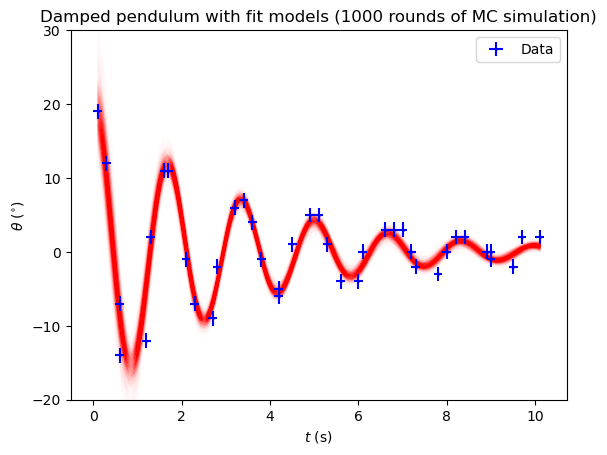

In [65]:
t_theo = np.linspace(np.min(t), np.max(t), 1000)



n_models = 1000
for i in range(n_models):

    # generate new dataset that follow the expected distribution
    t_mc, theta_mc = gen_dataset(t, theta, t_std, theta_std)

    popt, pcov = curve_fit(damped_model, t_mc, theta_mc, p0=[theta0_init, omeg_init, phi_init, alpha_init])
    theta0_i, omeg_i, phi_i, alpha_i = popt
    #print(popt)

    # plotting the fit
    plt.plot(t_theo, damped_model(t_theo, theta0_i, omeg_i, phi_i, alpha_i), color="r", alpha=5/n_models, zorder=-1)

plt.errorbar(t, theta, xerr=t_std, yerr=theta_std, color="b", fmt='o', markersize=1, label="Data")
plt.xlabel("$t$ (s)")
plt.ylabel(r"$\theta$ ($^{\circ}$)")
plt.title(f"Damped pendulum with fit models ({n_models} rounds of MC simulation)")

plt.ylim((-20, 30))

plt.legend()
plt.show()